# k-近邻算法

众所周知，电影可以按照题材分类，然而题材本身是如何定义的?由谁来判定某部电影属于哪
个题材?也就是说同一题材的电影具有哪些公共特征?这些都是在进行电影分类时必须要考虑的问
题。没有哪个电影人会说自己制作的电影和以前的某部电影类似，但我们确实知道每部电影在风格
上的确有可能会和同题材的电影相近。那么动作片具有哪些共有特征，使得动作片之间非常类似，
而与爱情片存在着明显的差别呢？动作片中也会存在接吻镜头，爱情片中也会存在打斗场景，我们
不能单纯依靠是否存在打斗或者亲吻来判断影片的类型。但是爱情片中的亲吻镜头更多，动作片中
的打斗场景也更频繁，基于此类场景在某部电影中出现的次数可以用来进行电影分类。本章第一节
基于电影中出现的亲吻、打斗出现的次数，使用k-近邻算法构造程序，自动划分电影的题材类型。
我们首先使用电影分类讲解k-近邻算法的基本概念，然后学习如何在其他系统上使用k-近邻算法。

本章介绍第一个机器学习算法： k-近邻算法，它非常有效而且易于掌握。首先，我们将探讨k-
近邻算法的基本理论，以及如何使用距离测量的方法分类物品；其次我们将使用Python从文本文件
中导入并解析数据；再次，本书讨论了当存在许多数据来源时，如何避免计算距离时可能碰到的一
些常见错误；最后，利用实际的例子讲解如何使用k-近邻算法改进约会网站和手写数字识别系统。

k-近邻算法（ kNN），它的工作原理是：存在一个样本数
据集合，也称作训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一数据
与所属分类的对应关系。输入没有标签的新数据后，将新数据的每个特征与样本集中数据对应的
特征进行比较，然后算法提取样本集中特征最相似数据（最近邻）的分类标签。一般来说，我们
只选择样本数据集中前k个最相似的数据，这就是k-近邻算法中k的出处，通常k是不大于20的整数。
最后，选择k个最相似数据中出现次数最多的分类，作为新数据的分类。

### 一、手动实现KNN

>- (1) 收集数据：可以使用任何方法。

>- (2) 准备数据：距离计算所需要的数值，最好是结构化的数据格式。

>- (3) 分析数据：可以使用任何方法。

>- (4) 训练算法：此步骤不适用于k-近邻算法。

>- (5) 测试算法：计算错误率。

>- (6) 使用算法：首先需要输入样本数据和结构化的输出结果，然后运行k-近邻算法判定输
入数据分别属于哪个分类，最后应用对计算出的分类执行后续的处理。

#### 1. 准备：使用Python 导入数据

In [3]:
import pandas as pd

In [4]:
#导入电影数据（训练集）
rowdata={'电影名称':['无问西东','后来的我们','前任3','红海行动','唐人街探案','战狼2'],
         '打斗镜头':[1,5,12,108,112,115],
         '接吻镜头':[101,89,97,5,9,8],
         '电影类型':['爱情片','爱情片','爱情片','动作片','动作片','动作片']}

In [5]:
#转换为DataFrame
movie_data= pd.DataFrame(rowdata)

In [6]:
#输出DateFrame
movie_data

,电影名称,打斗镜头,接吻镜头,电影类型
0,无问西东,1,101,爱情片
1,后来的我们,5,89,爱情片
2,前任3,12,97,爱情片
3,红海行动,108,5,动作片
4,唐人街探案,112,9,动作片
5,战狼2,115,8,动作片


#### 2.对于新电影白蛇缘起计算距离

假设白蛇缘起有24个打斗镜头，有67个接吻镜头，计算平方距离
$$D=\sqrt{\sum_i(x_i-y_i)^2}$$

## 新的电影的打斗镜头和接吻镜头

In [9]:
#新的电影的打斗镜头和接吻镜头
new_data = [56,120]

In [10]:
#计算新电影与训练集数据的距离
dist = list((((movie_data.iloc[:6,1:3]-new_data)**2).sum(1))**0.5)

In [16]:
#输出距离
dist

[58.18934610390462,
 59.682493245507096,
 49.64876634922564,
 126.21014222319853,
 124.32618388738553,
 126.58988901172162]

In [17]:
#训练集数据
movie_data.iloc[:6,1:3]

,打斗镜头,接吻镜头
0,1,101
1,5,89
2,12,97
3,108,5
4,112,9
5,115,8


In [21]:
#新的数据
new_data

[56, 120]

In [20]:
movie_data.iloc[:6,1:3]-new_data

,打斗镜头,接吻镜头
0,-55,-19
1,-51,-31
2,-44,-23
3,52,-115
4,56,-111
5,59,-112


In [15]:
(movie_data.iloc[:6,1:3]-new_data)**2

,打斗镜头,接吻镜头
0,3025,361
1,2601,961
2,1936,529
3,2704,13225
4,3136,12321
5,3481,12544


In [23]:
#计算出了距离
((movie_data.iloc[:6,1:3]-new_data)**2).sum(1)

0     3386
1     3562
2     2465
3    15929
4    15457
5    16025
dtype: int64

In [26]:
(((movie_data.iloc[:6,1:3]-new_data)**2).sum(1))**0.5

0     58.189346
1     59.682493
2     49.648766
3    126.210142
4    124.326184
5    126.589889
dtype: float64

In [28]:
#转化为list类型
list((((movie_data.iloc[:6,1:3]-new_data)**2).sum(1))**0.5)

[58.18934610390462,
 59.682493245507096,
 49.64876634922564,
 126.21014222319853,
 124.32618388738553,
 126.58988901172162]

In [29]:
#输出距离
dist

[58.18934610390462,
 59.682493245507096,
 49.64876634922564,
 126.21014222319853,
 124.32618388738553,
 126.58988901172162]

#### 3.将距离升序排列，然后选取距离最小的k个点

In [33]:
#距离和对应电影的标签对应起来
dist_l = pd.DataFrame({'dist': dist, 'labels': (movie_data.iloc[:6, 3])})

In [35]:
dist_l

,dist,labels
0,58.189346,爱情片
1,59.682493,爱情片
2,49.648766,爱情片
3,126.210142,动作片
4,124.326184,动作片
5,126.589889,动作片


In [36]:
#训练集的电影标签
(movie_data.iloc[:6, 3])

0    爱情片
1    爱情片
2    爱情片
3    动作片
4    动作片
5    动作片
Name: 电影类型, dtype: object

In [24]:

dist_l

,dist,labels
0,179.446371,爱情片
1,169.614268,爱情片
2,168.107109,爱情片
3,42.190046,动作片
4,38.832976,动作片
5,35.693137,动作片


In [37]:
#将距离按从小到大排序，并取出前K个数据
k=5
dr = dist_l.sort_values(by = 'dist')[: k]

In [38]:
#输出前k个数据
dr

,dist,labels
2,49.648766,爱情片
0,58.189346,爱情片
1,59.682493,爱情片
4,124.326184,动作片
3,126.210142,动作片


In [39]:
#让数据按dist这列进行排序
dist_l.sort_values(by = 'dist')

,dist,labels
2,49.648766,爱情片
0,58.189346,爱情片
1,59.682493,爱情片
4,124.326184,动作片
3,126.210142,动作片
5,126.589889,动作片


#### 4.确定前k个点所在类别的出现频率

In [40]:
#确定前k个点所在类别的个数
re = dr.loc[:,'labels'].value_counts()

In [41]:
re

爱情片    3
动作片    2
Name: labels, dtype: int64

In [42]:
#输出结果
re.index[0]

'爱情片'

#### 5.选择频率最高的类别作为当前点的预测类别

In [45]:
#选择频率最高的类别作为当前类的预测类别
result=[]
result.append(re.index[0])

In [47]:
#输出结果
result

['爱情片']

### 二、封装上述内容为函数
搞清楚输入输出，写好注释

In [122]:
import pandas as pd
"""
函数功能：KNN分类器
参数说明：
    inX:需要预测分类的数据集
    dataSet:已知分类标签的数据集（训练集）
    k:k-近邻算法参数，选择距离最小的k个点
返回：
    result：分类结果
"""

def classify0(inX,dataSet,k):
    result=[]
    dist = list((((movie_data.iloc[:6,1:3]-new_data)**2).sum(1))**0.5)
    dist_l = pd.DataFrame({'dist': dist, 'labels': (movie_data.iloc[:6, 3])})
    dr = dist_l.sort_values(by = 'dist')[: k]
    re = dr.loc[:,'labels'].value_counts()
    result.append(re.index[0])
    return result

测试函数运行结果

In [125]:
inX = new_data
dataSet= movie_data
k = 5

In [126]:
classify0(inX,dataSet,k)

['动作片']

### 三、k-近邻算法之约会网站配对效果判定

我的朋友海伦一直使用在线约会网站寻找适合自己的约会对象。尽管约会网站会推荐不同的
人选，但她并不是喜欢每一个人。经过一番总结，她发现曾交往过三种类型的人：
 
#### 不喜欢的人
#### 魅力一般的人
#### 极具魅力的人

海伦收集约会数据已经有了一段时间，她把这些数据存放在文本文件datingTestSet.txt中，每
个样本数据占据一行，总共有1000行。海伦的样本主要包含以下3种特征：
 
#### 每年获得的飞行常客里程数

#### 玩视频游戏所耗时间百分比
 
#### 每周消费的冰淇淋公升数

### 1. 准备数据
在将上述特征数据输入到分类器之前，必须将待处理数据的格式改变为分类器可以接受的格
式。

In [55]:
#读入约会数据
datingTest = pd.read_csv(r'K:\k-近邻算法\datingTestSet.txt',header=None,sep='\t')

In [56]:
#查看数据的前5行
datingTest.head()

,0,1,2,3
0,40920,8.326976,0.953952,largeDoses
1,14488,7.153469,1.673904,smallDoses
2,26052,1.441871,0.805124,didntLike
3,75136,13.147394,0.428964,didntLike
4,38344,1.669788,0.134296,didntLike


In [57]:
#查看数据的shape
datingTest.shape

(1000, 4)

In [37]:
#利用info()函数查看数据集的基本情况
datingTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
0    1000 non-null int64
1    1000 non-null float64
2    1000 non-null float64
3    1000 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 31.3+ KB


### 2. 可视化并分析数据

In [65]:
#可视化数据
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [66]:
#把不同标签用颜色区分
Colors = []
for i in range(datingTest.shape[0]):
    #获取最后一列的标签
    m = datingTest.iloc[i,-1]
    #如果是不喜欢用黑色的点来表示
    if m=='didntLike':
        Colors.append('black')
    #如果是有一点喜欢用橙色的点来表示
    if m=='smallDoses':
        Colors.append('orange')
    #如果是喜欢就用红色的点
    if m=='largeDoses':
        Colors.append('red')

In [67]:
#验证Colors这个列表里确实有1000个颜色
len(Colors)

1000

In [68]:
#训练集的行数
datingTest.shape[0]

1000

In [69]:
#训练集的列数
datingTest.shape[1]

4

In [70]:
#训练集第一行的数据
datingTest.iloc[0,-1]

'largeDoses'

绘制两两特征之间的散点图

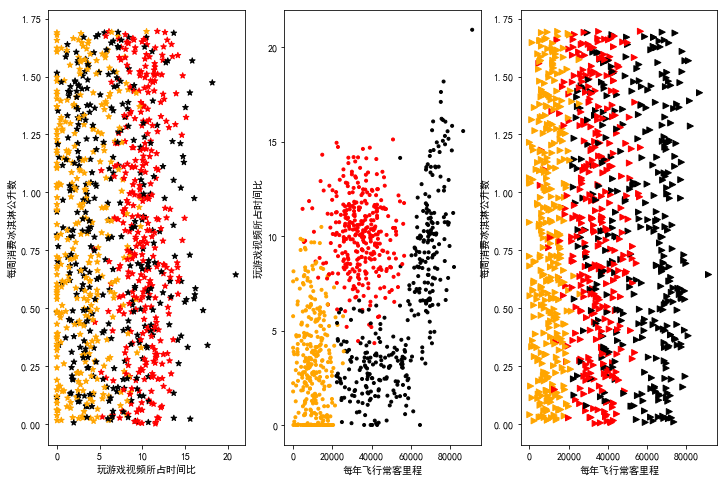

In [71]:
 #图中字体设置为黑体
plt.rcParams['font.sans-serif']=['Simhei']
#设置画布大小
pl=plt.figure(figsize=(12,8))
#设置子图
#第一个子图
fig1=pl.add_subplot(131)
#玩游戏所占时间比与每周消费冰淇淋公升数的关系
plt.scatter(datingTest.iloc[:,1],datingTest.iloc[:,2],marker='*',c=Colors)
plt.xlabel('玩游戏视频所占时间比')
plt.ylabel('每周消费冰淇淋公升数')
#第二个子图
fig2=pl.add_subplot(132)
#每年飞行里程和玩游戏时间的关系
plt.scatter(datingTest.iloc[:,0],datingTest.iloc[:,1],marker='.',c=Colors)
plt.xlabel('每年飞行常客里程')
plt.ylabel('玩游戏视频所占时间比')
#第三个子图
fig3=pl.add_subplot(133)
#飞行里程和冰淇淋公升数的关系
plt.scatter(datingTest.iloc[:,0],datingTest.iloc[:,2],marker='>',c=Colors)
plt.xlabel('每年飞行常客里程')
plt.ylabel('每周消费冰淇淋公升数')
#展示图像
plt.show()

### 3. 数据预处理：归一化
我们很容易发现，上面方程中数字差值最大的属性对计算结果的影响最大，也就是说，每年
获取的飞行常客里程数对于计算结果的影响将远远大于表2-3中其他两个特征——玩视频游戏的
和每周消费冰淇淋公升数——的影响。而产生这种现象的唯一原因，仅仅是因为飞行常客里程数
远大于其他特征值。但海伦认为这三种特征是同等重要的，因此作为三个等权重的特征之一，飞
行常客里程数并不应该如此严重地影响到计算结果。

In [72]:
"""
函数功能：归一化
参数说明：
dataSet:原始数据集
返回：0-1标准化之后的数据集
"""

def minmax(dataSet):
    minDf = dataSet.min()
    maxDf = dataSet.max()
    normSet = (dataSet - minDf )/(maxDf - minDf)
    return normSet

In [73]:
datingTest.iloc[:,:3]

,0,1,2
0,40920,8.326976,0.953952
1,14488,7.153469,1.673904
2,26052,1.441871,0.805124
3,75136,13.147394,0.428964
4,38344,1.669788,0.134296
5,72993,10.141740,1.032955
6,35948,6.830792,1.213192
7,42666,13.276369,0.543880
8,67497,8.631577,0.749278
9,35483,12.273169,1.508053


In [52]:
每一列中最大的值
datingTest.iloc[:,:3].max()

0    91273.000000
1       20.919349
2        1.695517
dtype: float64

In [74]:
#将每个数据归一化
minmax(datingTest.iloc[:, :3])

,0,1,2
0,0.448325,0.398051,0.562334
1,0.158733,0.341955,0.987244
2,0.285429,0.068925,0.474496
3,0.823201,0.628480,0.252489
4,0.420102,0.079820,0.078578
5,0.799722,0.484802,0.608961
6,0.393851,0.326530,0.715335
7,0.467455,0.634645,0.320312
8,0.739507,0.412612,0.441536
9,0.388757,0.586690,0.889360


In [76]:
#根据列来进行拼接
datingT = pd.concat([minmax(datingTest.iloc[:, :3]), datingTest.iloc[:,3]], axis=1)

归一化后的数据

In [78]:
#归一后的数据
datingT

,0,1,2,3
0,0.448325,0.398051,0.562334,largeDoses
1,0.158733,0.341955,0.987244,smallDoses
2,0.285429,0.068925,0.474496,didntLike
3,0.823201,0.628480,0.252489,didntLike
4,0.420102,0.079820,0.078578,didntLike
5,0.799722,0.484802,0.608961,didntLike
6,0.393851,0.326530,0.715335,largeDoses
7,0.467455,0.634645,0.320312,largeDoses
8,0.739507,0.412612,0.441536,didntLike
9,0.388757,0.586690,0.889360,largeDoses


In [79]:
#取前5行
datingT.head()

,0,1,2,3
0,0.448325,0.398051,0.562334,largeDoses
1,0.158733,0.341955,0.987244,smallDoses
2,0.285429,0.068925,0.474496,didntLike
3,0.823201,0.628480,0.252489,didntLike
4,0.420102,0.079820,0.078578,didntLike


上节我们已经将数据按照需求做了处理，本节我们将测试分类器的效果，如果分类器的正确
率满足要求，海伦就可以使用这个软件来处理约会网站提供的约会名单了。机器学习算法一个很
重要的工作就是评估算法的正确率，通常我们只提供已有数据的90%作为训练样本来训练分类
器，而使用其余的10%数据去测试分类器，检测分类器的正确率。本书后续章节还会介绍一些高
级方法完成同样的任务，这里我们还是采用最原始的做法。需要注意的是，10%的测试数据应该
是随机选择的，由于海伦提供的数据并没有按照特定目的来排序，所以我们可以随意选择10%数
据而不影响其随机性。

In [83]:
"""
函数功能：切分训练集和测试集
参数说明：
dataSet:原始数据集
rate:训练集所占比例
返回：切分好的训练集和测试集
"""

def randSplit(dataSet,rate=0.9):
    #原始数据集的行数
    n = dataSet.shape[0]
    #训练集的行数
    m = int(n*rate)
    train = dataSet.iloc[:m,:]
    test = dataSet.iloc[m:,:]
    test.index = range(test.shape[0])#每一行
    return train,test

In [84]:
#返回切分好后的数据
train,test = randSplit(datingT)

In [86]:
#训练集
train

,0,1,2,3
0,0.448325,0.398051,0.562334,largeDoses
1,0.158733,0.341955,0.987244,smallDoses
2,0.285429,0.068925,0.474496,didntLike
3,0.823201,0.628480,0.252489,didntLike
4,0.420102,0.079820,0.078578,didntLike
5,0.799722,0.484802,0.608961,didntLike
6,0.393851,0.326530,0.715335,largeDoses
7,0.467455,0.634645,0.320312,largeDoses
8,0.739507,0.412612,0.441536,didntLike
9,0.388757,0.586690,0.889360,largeDoses


In [65]:
test

,0,1,2,3
0,0.513766,0.170320,0.262181,didntLike
1,0.089599,0.154426,0.785277,smallDoses
2,0.611167,0.172689,0.915245,didntLike
3,0.012578,0.000000,0.195477,smallDoses
4,0.110241,0.187926,0.287082,smallDoses
5,0.812113,0.705201,0.681085,didntLike
6,0.729712,0.490545,0.960202,didntLike
7,0.130301,0.133239,0.926158,smallDoses
8,0.557755,0.722409,0.780811,largeDoses
9,0.437051,0.247835,0.131156,largeDoses


In [88]:
#训练集的列数
train.shape[1]

4

In [67]:
#测试集的行数
test.shape[0]

100

In [89]:
#测试集
test

,0,1,2,3
0,0.513766,0.170320,0.262181,didntLike
1,0.089599,0.154426,0.785277,smallDoses
2,0.611167,0.172689,0.915245,didntLike
3,0.012578,0.000000,0.195477,smallDoses
4,0.110241,0.187926,0.287082,smallDoses
5,0.812113,0.705201,0.681085,didntLike
6,0.729712,0.490545,0.960202,didntLike
7,0.130301,0.133239,0.926158,smallDoses
8,0.557755,0.722409,0.780811,largeDoses
9,0.437051,0.247835,0.131156,largeDoses


### 5. 分类器针对于约会网站的测试代码

In [91]:
def datingClass(train,test,k):
    n = train.shape[1] - 1   #3
    m = test.shape[0]       #100
    result = []
    for i in range(m):
        dist = list((((train.iloc[:, :n] - test.iloc[i, :n]) ** 2).sum(1))**0.5)
        dist_l = pd.DataFrame({'dist': dist, 'labels': (train.iloc[:, n])})
        dr = dist_l.sort_values(by = 'dist')[: k]
        re = dr.loc[:, 'labels'].value_counts()
        result.append(re.index[0])
    result = pd.Series(result)
    test['predict'] = result
    acc = (test.iloc[:,-1]==test.iloc[:,-2]).mean()
    print(f'模型预测准确率为{acc}')
    return test

In [70]:
#训练集
train.iloc[:,:3]

,0,1,2
0,0.448325,0.398051,0.562334
1,0.158733,0.341955,0.987244
2,0.285429,0.068925,0.474496
3,0.823201,0.628480,0.252489
4,0.420102,0.079820,0.078578
5,0.799722,0.484802,0.608961
6,0.393851,0.326530,0.715335
7,0.467455,0.634645,0.320312
8,0.739507,0.412612,0.441536
9,0.388757,0.586690,0.889360


验证模型

In [92]:
#验证模型
datingClass(train,test,1)

模型预测准确率为0.94


K:\anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,0,1,2,3,predict
0,0.513766,0.170320,0.262181,didntLike,didntLike
1,0.089599,0.154426,0.785277,smallDoses,smallDoses
2,0.611167,0.172689,0.915245,didntLike,didntLike
3,0.012578,0.000000,0.195477,smallDoses,smallDoses
4,0.110241,0.187926,0.287082,smallDoses,smallDoses
5,0.812113,0.705201,0.681085,didntLike,didntLike
6,0.729712,0.490545,0.960202,didntLike,didntLike
7,0.130301,0.133239,0.926158,smallDoses,smallDoses
8,0.557755,0.722409,0.780811,largeDoses,largeDoses
9,0.437051,0.247835,0.131156,largeDoses,largeDoses


## 四、k-近邻算法之手写数字识别
本节我们一步步地构造使用k-近邻分类器的手写识别系统。为了简单起见，这里构造的系统
只能识别数字0到9，参见图2-6。需要识别的数字已经使用图形处理软件，处理成具有相同的色
彩和大小①：宽高是32像素×32像素的黑白图像。尽管采用文本格式存储图像不能有效地利用内
存空间，但是为了方便理解，我们还是将图像转换为文本格式。

### 1. 准备数据
目录trainingDigits中包含了大约2000个例子，
每个数字大约有200个样本；目录testDigits中包含了大约900个测试
数据。我们使用目录trainingDigits中的数据训练分类器，使用目录testDigits中的数据测试分类器
的效果。两组数据没有重叠，你可以检查一下这些文件夹的文件是否符合要求。

In [105]:
import os
"""
函数功能：得到标记好的训练集
"""
def get_train():
    path='K:/k-近邻算法/digits/trainingDigits'
    #文件的数目
    trainingFileList = os.listdir(path)
    train = pd.DataFrame()                             
    img = []
    labels =[]
    #读取文件中的内容
    for i in range(len(trainingFileList)):
        filename = trainingFileList[i]
        txt = pd.read_csv(f'K:/k-近邻算法/digits/trainingDigits/{filename}',header=None)
        num = ''
        #每一行
        for i in range(txt.shape[0]):
            num += txt.iloc[i,:]
        img.append(num[0])
        filelabel = filename.split('_')[0]
        labels.append(filelabel)
    train['img'] = img
    train['labels'] = labels
    return train

In [106]:
 #文件路径
 path='K:/k-近邻算法/digits/trainingDigits'

In [107]:
#此目录下的文件
trainingFileList = os.listdir(path)

In [111]:
#每一个文件
filename = trainingFileList[0]

In [112]:
#文件名字
filename

'0_0.txt'

In [113]:
#读取文件
txt = pd.read_csv(f'K:/k-近邻算法/digits/trainingDigits/{filename}',header=None)

In [114]:
txt

,0
0,00000000000001111000000000000000
1,00000000000011111110000000000000
2,00000000001111111111000000000000
3,00000001111111111111100000000000
4,00000001111111011111100000000000
5,00000011111110000011110000000000
6,00000011111110000000111000000000
7,00000011111110000000111100000000
8,00000011111110000000011100000000
9,00000011111110000000011100000000


In [115]:
#文件的行数
txt.shape[0]

32

In [117]:
#将txt的文件放到num字符串里
num = ''
for i in range(txt.shape[0]):
    num += txt.iloc[i,:]


In [119]:
num[0]

'000000000000011110000000000000000000000000001111111000000000000000000000001111111111000000000000000000011111111111111000000000000000000111111101111110000000000000000011111110000011110000000000000000111111100000001110000000000000001111111000000011110000000000000011111110000000011100000000000000111111100000000111000000000000001111110000000001111000000000000011111100000000001110000000000000111111000000000011100000000000000111111000000000011100000000000001111110000000000111000000000000011111100000000001110000000000000111111000000000011100000000000011111110000000001111000000000000111101100000000011110000000000001111000000000001111000000000000001111000000000001111000000000000011110000000000111110000000000000111100000000011111000000000000001111000000001111100000000000000001110000001111110000000000000000011110001111111000000000000000000111111111111110000000000000000000111111111111100000000000000000001111111111110000000000000000000001111111110000000000000000000000001111100000000000000000000000

In [120]:
#获取训练集
train = get_train()

In [121]:
#训练集
train

,img,labels
0,0000000000000111100000000000000000000000000011...,0
1,0000000000011111000000000000000000000000001111...,0
2,0000000000000011000000000000000000000000000001...,0
3,0000000000001111000000000000000000000000000111...,0
4,0000000000000011111000000000000000000000000011...,0
5,0000000000000110000000000000000000000000000111...,0
6,0000000000000011110000000000000000000000000011...,0
7,0000000000000011100000000000000000000000000111...,0
8,0000000000000010000000000000000000000000000001...,0
9,0000000000000011110000000000000000000000000011...,0


In [122]:
train.iloc[0,0]

'000000000000011110000000000000000000000000001111111000000000000000000000001111111111000000000000000000011111111111111000000000000000000111111101111110000000000000000011111110000011110000000000000000111111100000001110000000000000001111111000000011110000000000000011111110000000011100000000000000111111100000000111000000000000001111110000000001111000000000000011111100000000001110000000000000111111000000000011100000000000000111111000000000011100000000000001111110000000000111000000000000011111100000000001110000000000000111111000000000011100000000000011111110000000001111000000000000111101100000000011110000000000001111000000000001111000000000000001111000000000001111000000000000011110000000000111110000000000000111100000000011111000000000000001111000000001111100000000000000001110000001111110000000000000000011110001111111000000000000000000111111111111110000000000000000000111111111111100000000000000000001111111111110000000000000000000001111111110000000000000000000000001111100000000000000000000000

In [123]:
32*32

1024

In [167]:
#训练集的前五个数据
train.head()

,img,labels
0,0000000000000111100000000000000000000000000011...,0
1,0000000000011111000000000000000000000000001111...,0
2,0000000000000011000000000000000000000000000001...,0
3,0000000000001111000000000000000000000000000111...,0
4,0000000000000011111000000000000000000000000011...,0


In [168]:
#统计各个数字的频率
train.iloc[:,-1].value_counts()

9    204
7    201
3    199
1    198
2    195
6    195
0    189
5    187
4    186
8    180
Name: labels, dtype: int64

In [169]:
#第五个数据
print(train.iloc[5,0])

0000000000000110000000000000000000000000000111111100000000000000000000000011111111100000000000000000000001111111111100000000000000000000111111111111100000000000000000001111111111111000000000000000000111111111111111000000000000000011111100011111110000000000000000011111000001111110000000000000000111111000011111100000000000000000111110000011111000000000000000001111100000011111000000000000000011111000000111111000000000000000111100000000111110000000000000011111000000001111100000000000000011110000000001111000000000000001111100000000011110000000000000001111000000000111100000000000000111110000000001111100000000000001111100000000011111000000000000001111000000000111100000000000000011110000000001111000000000000000111100000000011110000000000000001111100000001111100000000000000011111000000011111000000000000000111110000001111100000000000000001111110001111111000000000000000011111111111111100000000000000000011111111111111000000000000000000011111111111100000000000000000000111111111100000000000000000000

In [170]:
#每一条数据的长度
len(train.iloc[5,0])

1024

In [171]:
"""
函数功能：得到标记好的测试集
"""
def get_test():
    path='K:/k-近邻算法/digits/testDigits'
    testFileList = os.listdir(path)
    test=pd.DataFrame()
    img = []
    labels =[]
    for i in range(len(testFileList)):
        filename = testFileList[i]
        txt = pd.read_csv(f'K:/k-近邻算法/digits/testDigits/{filename}',header=None)
        num = ''
        for i in range(txt.shape[0]):
            num += txt.iloc[i,:]
        img.append(num[0])
        filelabel = filename.split('_')[0]
        labels.append(filelabel)
    test['img'] = img
    test['labels'] = labels
    return test

In [172]:
#获得数据集
test = get_test()

In [173]:
#数据集的前5项
test.head()

,img,labels
0,0000000000000110000000000000000000000000000011...,0
1,0000000000000001100000000000000000000000000111...,0
2,0000000000010000000000000000000000000000001111...,0
3,0000000000000010110000000000000000000000000011...,0
4,0000000000000000011100000000000000000000000000...,0


In [83]:
!pip3 install Levenshtein

  Could not find a version that satisfies the requirement Levenshtein (from versions: )
No matching distribution found for Levenshtein


### 2. 分类器针对于手写数字的测试代码

In [174]:
import Levenshtein

In [175]:
#引入距离函数
from Levenshtein import hamming

In [176]:
hamming('abc', 'aac')

1

In [177]:
hamming('0010', '1111')

3

In [178]:
"""
函数功能：k-近邻算法实现手写数字分类
参数说明：
train:训练集
test：测试集
k:k-近邻参数，即选择距离最小的k个点
返回：预测好分类的测试集
"""
def handwritingClass(train,test,k):
    n = train.shape[0]
    m = test.shape[0]
    result = []
    for i in range(m):
        dist = []
        for j in range(n):
            d =str(hamming(train.iloc[j,0], test.iloc[i,0]))
            dist.append(d)
        dist_l = pd.DataFrame({'dist': dist, 'labels': (train.iloc[:, 1])})
        dr = dist_l.sort_values(by = 'dist')[: k]
        re = dr.loc[:, 'labels'].value_counts()
        result.append(re.index[0])
    result = pd.Series(result)
    test['predict'] = result
    acc = (test.iloc[:,-1]==test.iloc[:,-2]).mean()
    print(f'模型预测准确率为{acc}')
    return test

In [179]:
handwritingClass(train,test,3)

模型预测准确率为0.9788583509513742


,img,labels,predict
0,0000000000000110000000000000000000000000000011...,0,0
1,0000000000000001100000000000000000000000000111...,0,0
2,0000000000010000000000000000000000000000001111...,0,0
3,0000000000000010110000000000000000000000000011...,0,0
4,0000000000000000011100000000000000000000000000...,0,0
5,0000000000000011110000000000000000000000000011...,0,0
6,0000000000000011110000000000000000000000000001...,0,0
7,0000000000000011111000000000000000000000000011...,0,0
8,0000000000010000000000000000000000000000001100...,0,0
9,0000000000000110000000000000000000000000000111...,0,0
